## Exploratory Data Analysis for Heart Disease
Examining the Heart Disease UCI dataset using various data analysis techniques, such as PCA, feature correlation and skewness. The dataset provides information about hundreds of patient's health and whether they have heart disease. All features are numeric, and there appears to be no missing data.

In [1]:
library(tidyverse)
library(corrplot)
library(moments)
library(ggplot2)
library(ggfortify)
library(ggthemes)
library(ggpubr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.2          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.84 loaded



### Importing Dataset

In [2]:
heart_data <- read_csv("heart.csv", col_types=cols())

### Column Descriptions
* age - of patient
* sex - gender (1=male, 0=female)
* cp - chest pain type (values 0,1,2,3)
* trestbps - resting blood pressure
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1=true, 0=false)
* restecg - resting electrocardiographic results (values 0,1,2)
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1=yes, 0=no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal: a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: has heart disease (1=yes, 0=no)

### Data Types and Dataset Size

In [3]:
str(heart_data)

tibble [303 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:303] 63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : num [1:303] 1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : num [1:303] 3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: num [1:303] 145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : num [1:303] 233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : num [1:303] 1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : num [1:303] 0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : num [1:303] 150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : num [1:303] 0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num [1:303] 2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : num [1:303] 0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : num [1:303] 0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : num [1:303] 1 2 2 2 2 1 2 3 3 2 ...
 $ target  : num [1:303] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_double(),
  ..   cp = col_double(),
  ..   trestbps = col_double(),
  ..   chol = col_double(

### Missing Values

In [4]:
df <- data.frame("column"=names(heart_data), "null_count"=as.numeric(colSums(is.na(heart_data))))
df %>% arrange(desc(null_count))

column,null_count
<fct>,<dbl>
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


### Statistics of Numeric Features

In [5]:
summary(heart_data)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

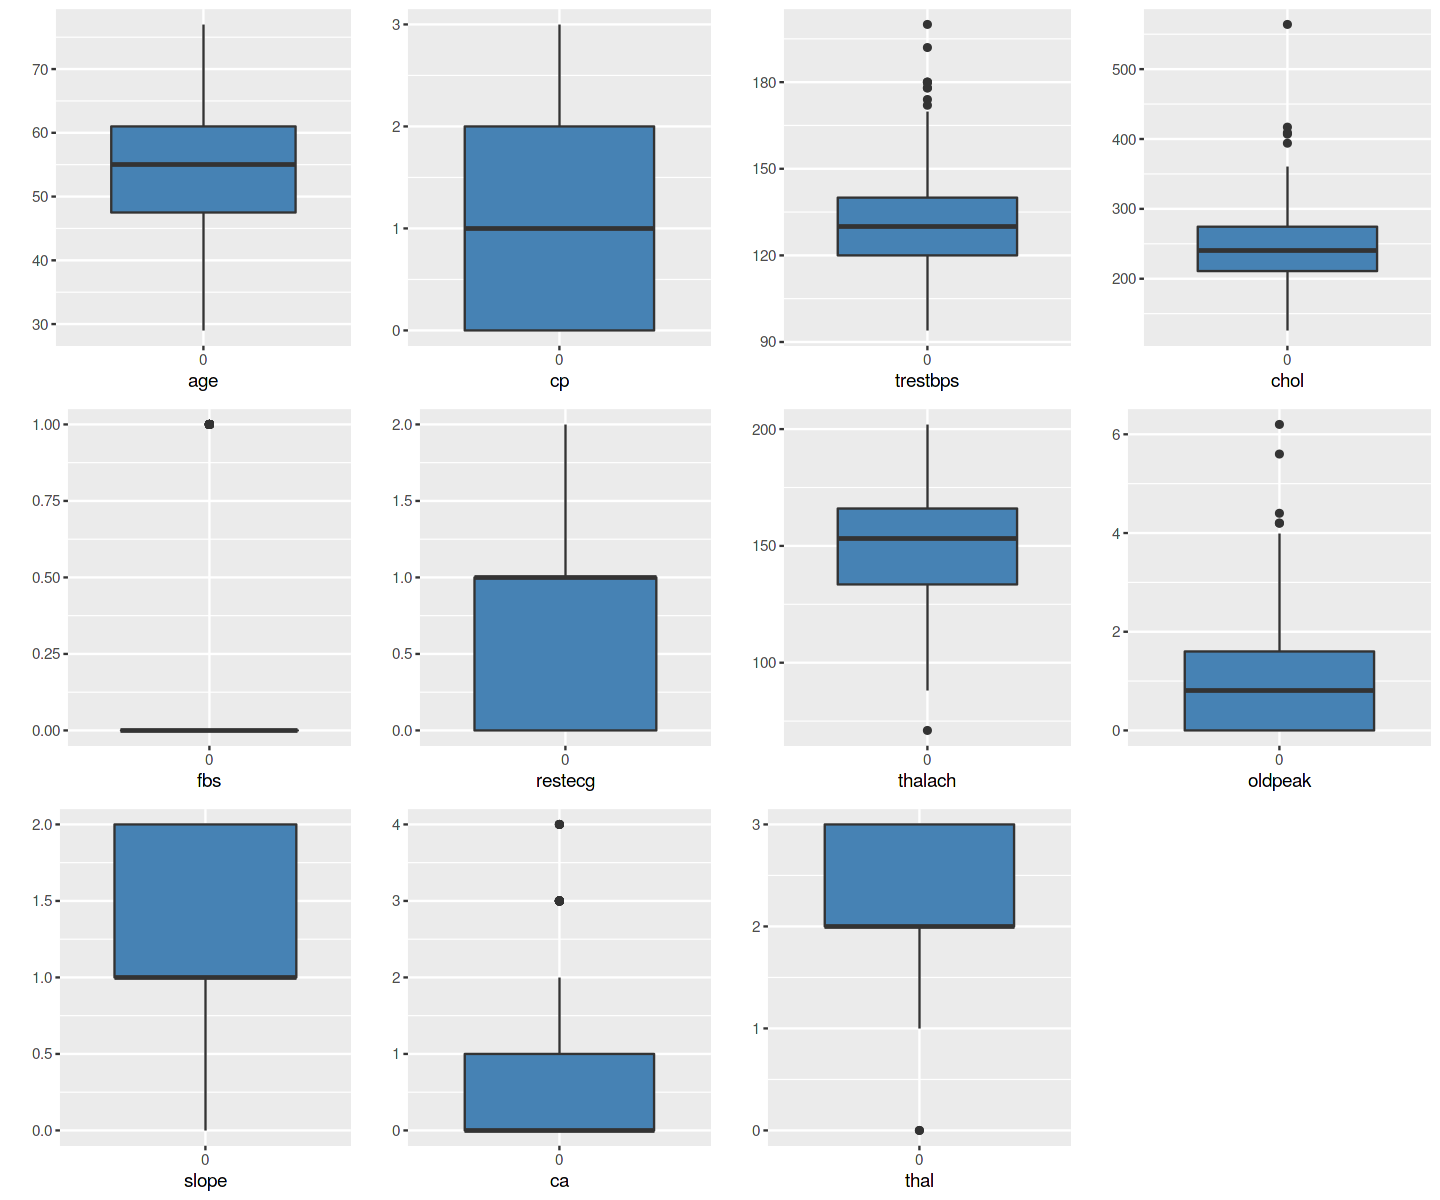

In [6]:
boxplot <- function(column) {

    plot <- ggplot(heart_data, aes(x=factor(0), y=get(column))) +
            geom_boxplot(fill="steelblue") +
            labs(x=column, y="")
    
    return(plot)
}

age <- boxplot("age")
cp <- boxplot("cp")
trestbps <- boxplot("trestbps")
chol <- boxplot("chol")
fbs <- boxplot("fbs")
restecg <- boxplot("restecg")
thalach <- boxplot("thalach")
oldpeak <- boxplot("oldpeak")
slope <- boxplot("slope")
ca <- boxplot("ca")
thal <- boxplot("thal")

options(repr.plot.width=12, repr.plot.height=10)
ggarrange(age, cp, trestbps, chol, fbs, restecg, 
          thalach, oldpeak, slope, ca, thal, 
          ncol=4, nrow=3)

### Skewness and Distribution of Numeric Features

In [7]:
df <- data.frame("column"=names(heart_data), "skewness"=as.numeric(apply(heart_data, 2, skewness)))
df %>% arrange(desc(skewness))

column,skewness
<fct>,<dbl>
fbs,1.9768035
ca,1.3039260
oldpeak,1.2634255
chol,1.1377326
exang,0.7388506
trestbps,0.7102301
cp,0.4823294
restecg,0.1617166
target,-0.1789296


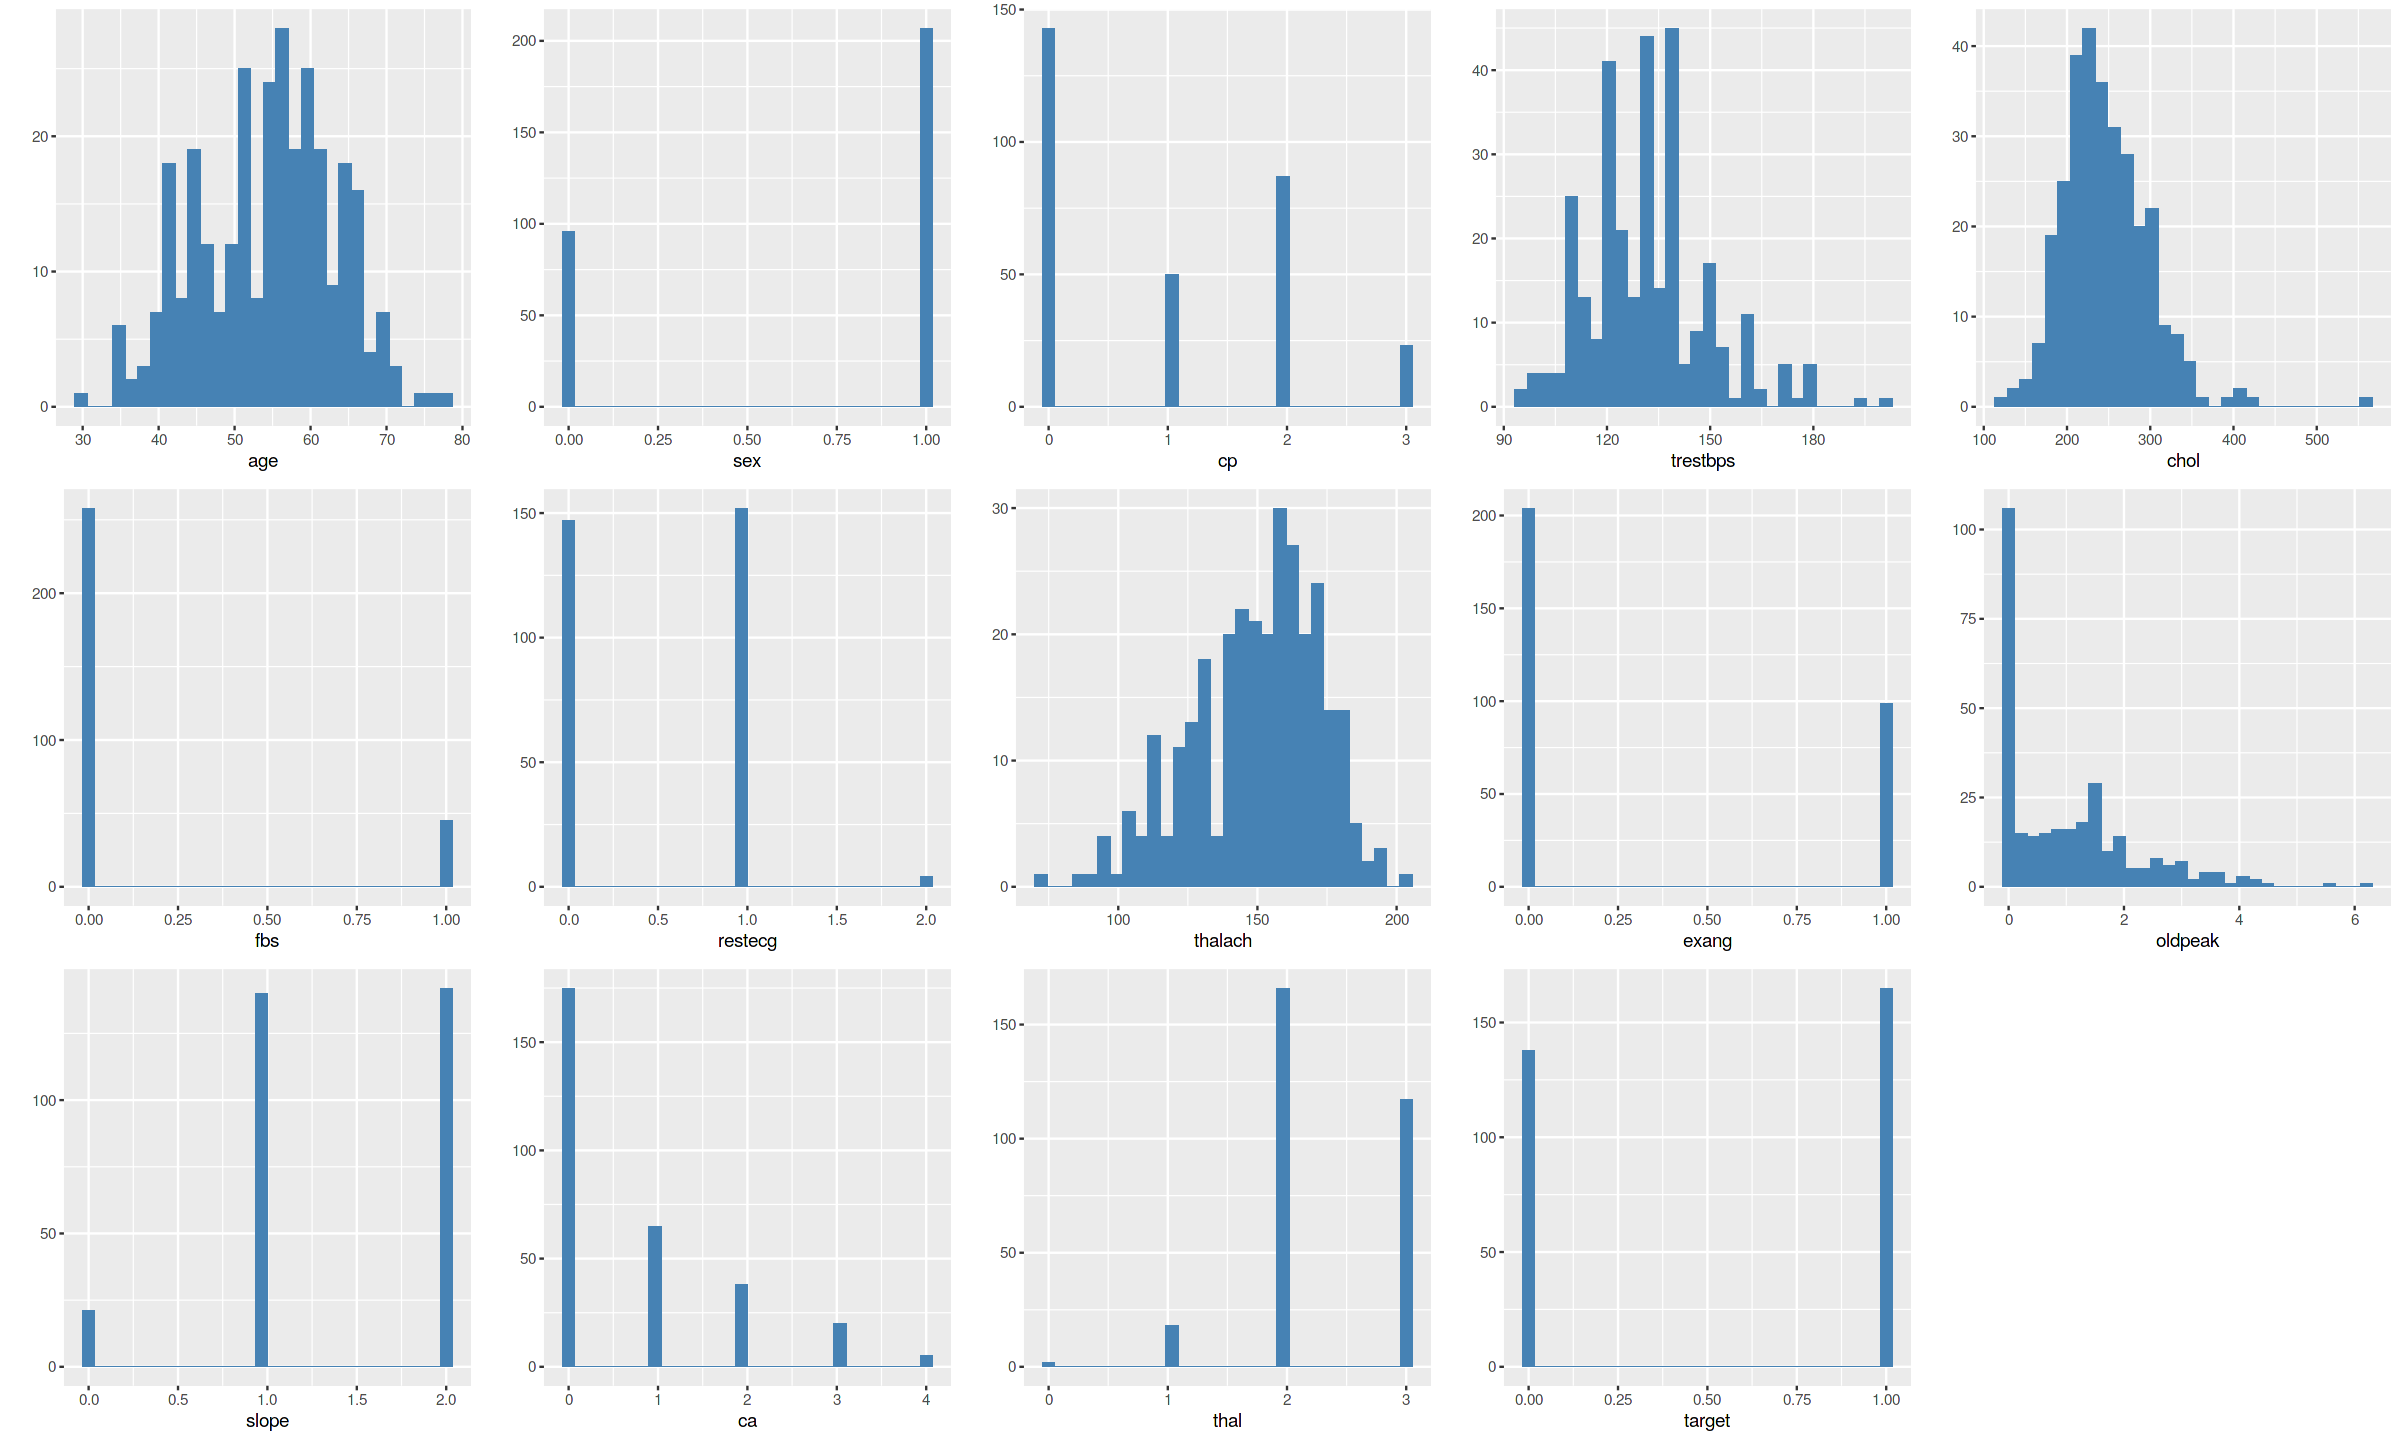

In [8]:
histogram <- function(column) {

    plot <- ggplot(heart_data, aes(x=get(column))) +
            geom_histogram(bins=30, fill="steelblue") +
            labs(x=column, y="")
    
    return(plot)
}

age <- histogram("age")
sex <- histogram("sex")
cp <- histogram("cp")
trestbps <- histogram("trestbps")
chol <- histogram("chol")
fbs <- histogram("fbs")
restecg <- histogram("restecg")
thalach <- histogram("thalach")
exang <- histogram("exang")
oldpeak <- histogram("oldpeak")
slope <- histogram("slope")
ca <- histogram("ca")
thal <- histogram("thal")
target <- histogram("target")

options(repr.plot.width=20, repr.plot.height=12)
ggarrange(age, sex, cp, trestbps, chol, fbs, restecg, 
          thalach, exang, oldpeak, slope, ca, thal, target,
          ncol=5, nrow=3)

### Correlation between Numeric Features

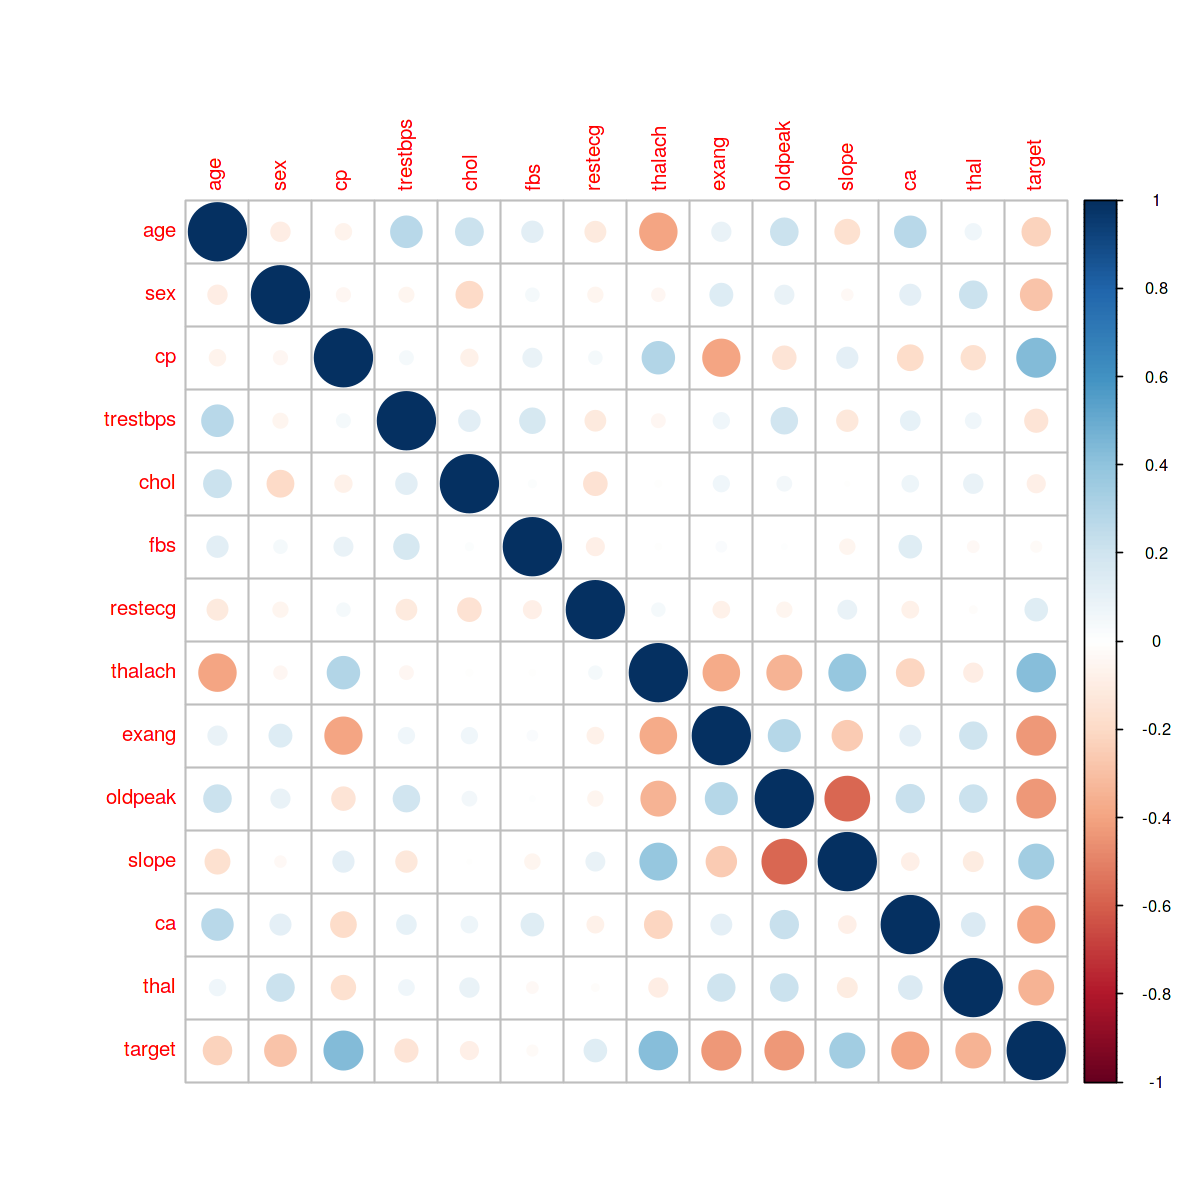

In [9]:
options(repr.plot.width=10, repr.plot.height=10)
heart_data %>%
    cor() %>%
    corrplot()

### Correlation between Target and Numeric Features

In [10]:
heart_data %>%
    cor() %>%
    as.data.frame %>%
    arrange(desc(target)) %>%
    select(target)

,target
,<dbl>
target,1.00000000
cp,0.43379826
thalach,0.42174093
slope,0.34587708
restecg,0.13722950
fbs,-0.02804576
chol,-0.08523911
trestbps,-0.14493113
age,-0.22543872


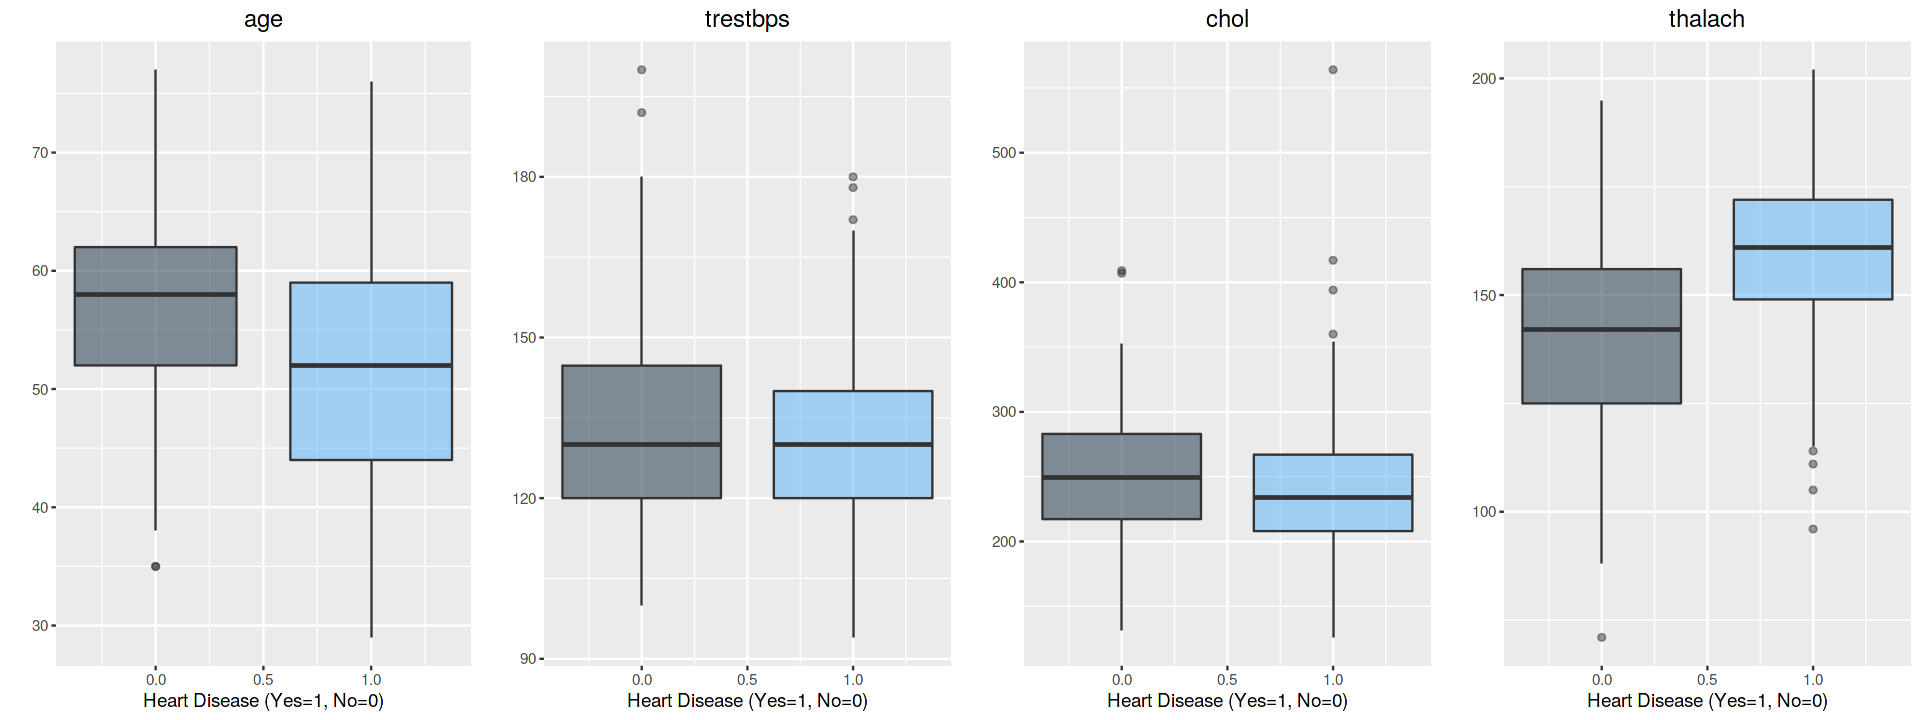

In [11]:
target_boxplot <- function(column) {
    
    plot <- ggplot(heart_data, aes(x=target, y=get(column), group=target, fill=target)) +
            geom_boxplot(alpha=0.5) +
            theme(legend.position="none",
                  plot.title=element_text(hjust=0.5, size=14)) +
            labs(x="Heart Disease (Yes=1, No=0)", y="", title=column)
    
    return(plot) 
}

age <- target_boxplot("age")
trestbps <- target_boxplot("trestbps")
chol <- target_boxplot("chol")
thalach <- target_boxplot("thalach")

options(repr.plot.width=16, repr.plot.height=6)
ggarrange(age, trestbps, chol, thalach,
          ncol=4, nrow=1)

### Principal Component Analysis (PCA)

In [12]:
heart_data$heart_disease <- with(heart_data, ifelse(target==1, "Yes", "No"))
heart_data$gender <- with(heart_data, ifelse(sex==1, "Male", "Female"))
heart_data$exercise_induced_angina <- with(heart_data, ifelse(exang==1, "Yes", "No"))
heart_data$high_fasting_blood_sugar <- with(heart_data, ifelse(fbs==1, "Yes", "No"))
heart_data_pca <- prcomp(heart_data[, -c(14,15,16,17,18)], center=TRUE, scale.=TRUE)
summary(heart_data_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.6622 1.2396 1.10582 1.08681 1.01092 0.98489 0.92885
Proportion of Variance 0.2125 0.1182 0.09406 0.09086 0.07861 0.07462 0.06637
Cumulative Proportion  0.2125 0.3307 0.42481 0.51567 0.59428 0.66890 0.73527
                           PC8    PC9    PC10    PC11    PC12   PC13
Standard deviation     0.88088 0.8479 0.78840 0.72808 0.65049 0.6098
Proportion of Variance 0.05969 0.0553 0.04781 0.04078 0.03255 0.0286
Cumulative Proportion  0.79495 0.8503 0.89807 0.93885 0.97140 1.0000

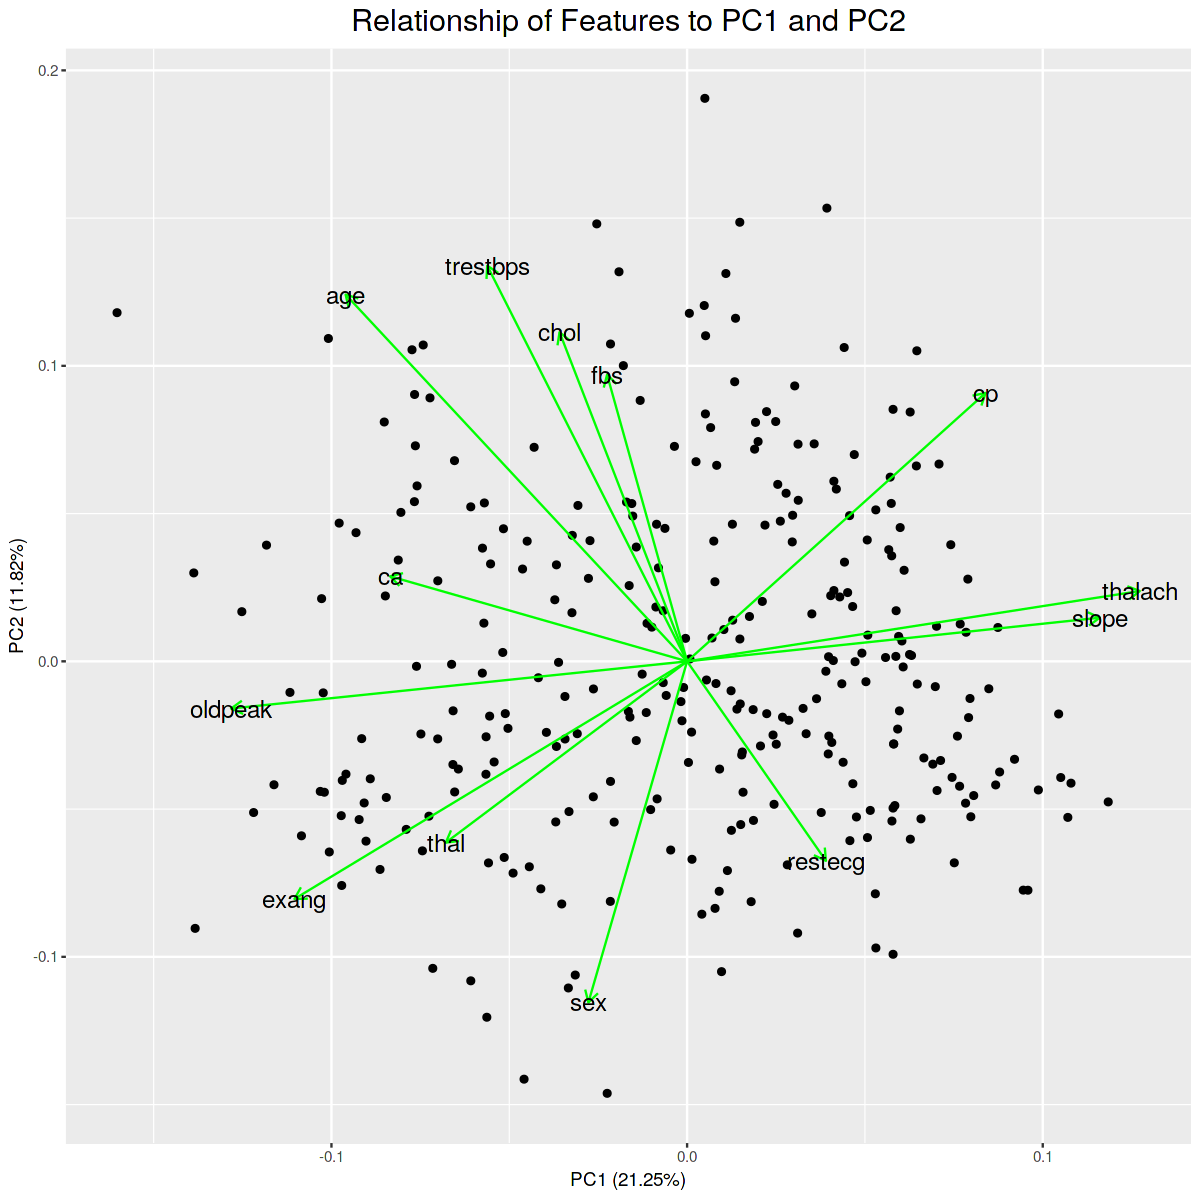

In [13]:
options(repr.plot.width=10, repr.plot.height=10)
autoplot(heart_data_pca,
         x=1,
         y=2,
         loadings=TRUE,  
         loadings.colour="green", 
         loadings.label=TRUE, 
         loadings.label.colour="black", 
         loadings.label.size=5) + 
    ggtitle("Relationship of Features to PC1 and PC2") + 
    theme(plot.title=element_text(hjust=0.5, size=18))

Warning message:
“`select_()` is deprecated as of dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


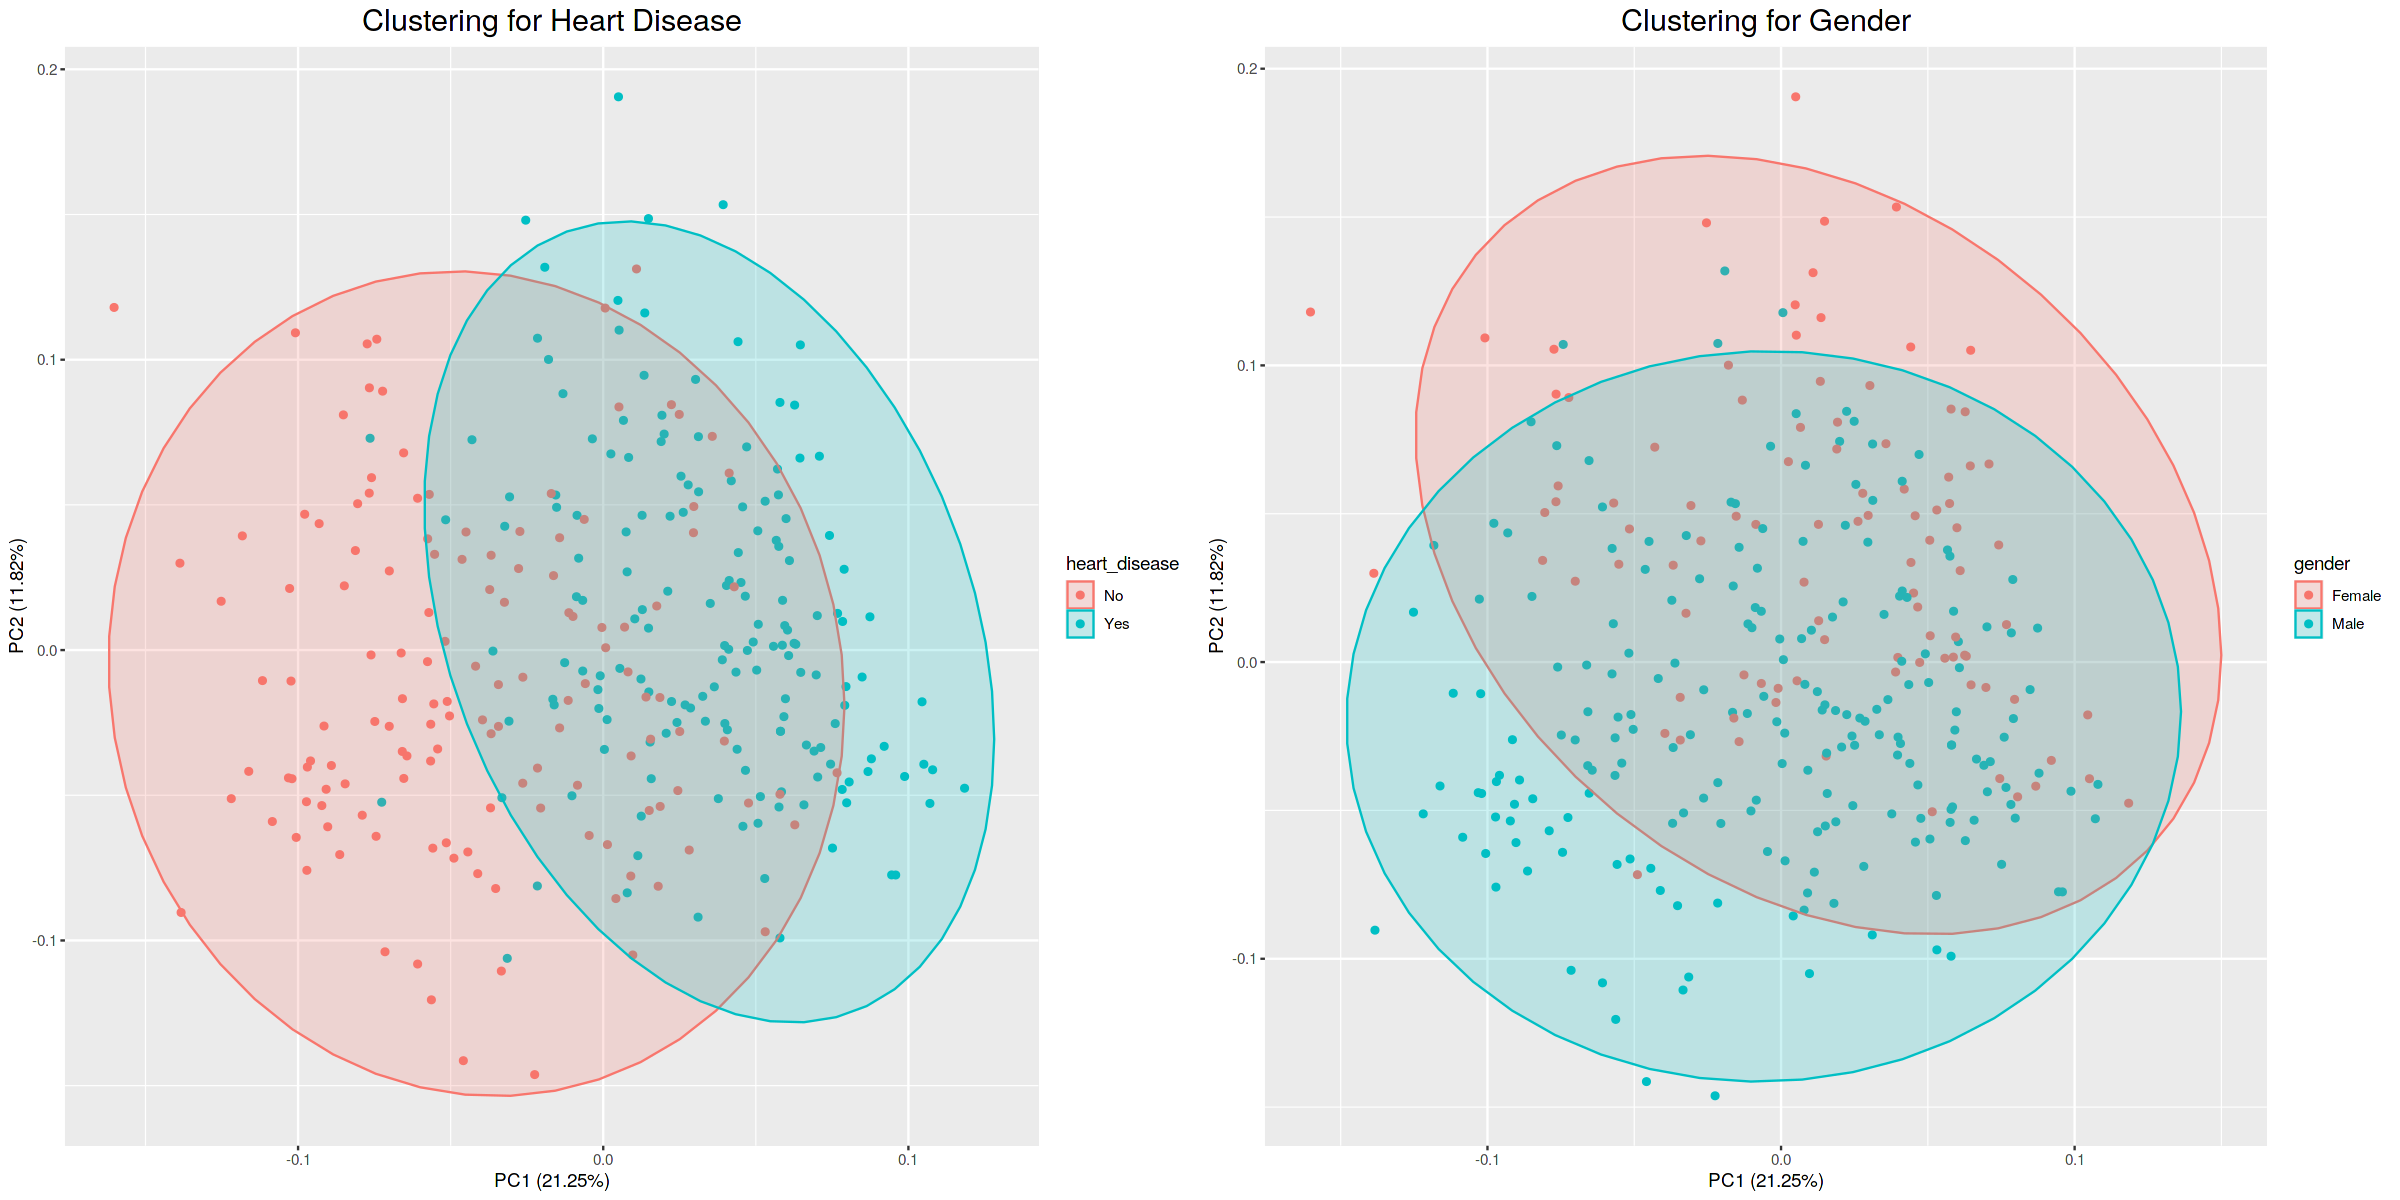

In [14]:
options(repr.plot.width=20, repr.plot.height=10)
p1 <- autoplot(heart_data_pca, data=heart_data, 
         x=1,
         y=2,
         colour="heart_disease", 
         frame=TRUE,
         frame.type='norm') + 
      ggtitle("Clustering for Heart Disease") + 
      theme(plot.title=element_text(hjust=0.5, size=18))
p2 <- autoplot(heart_data_pca, data=heart_data, 
         x=1,
         y=2,
         colour="gender", 
         frame=TRUE,
         frame.type='norm') + 
      ggtitle("Clustering for Gender") + 
      theme(plot.title=element_text(hjust=0.5, size=18))
ggarrange(p1, p2, ncol=2, nrow=1)

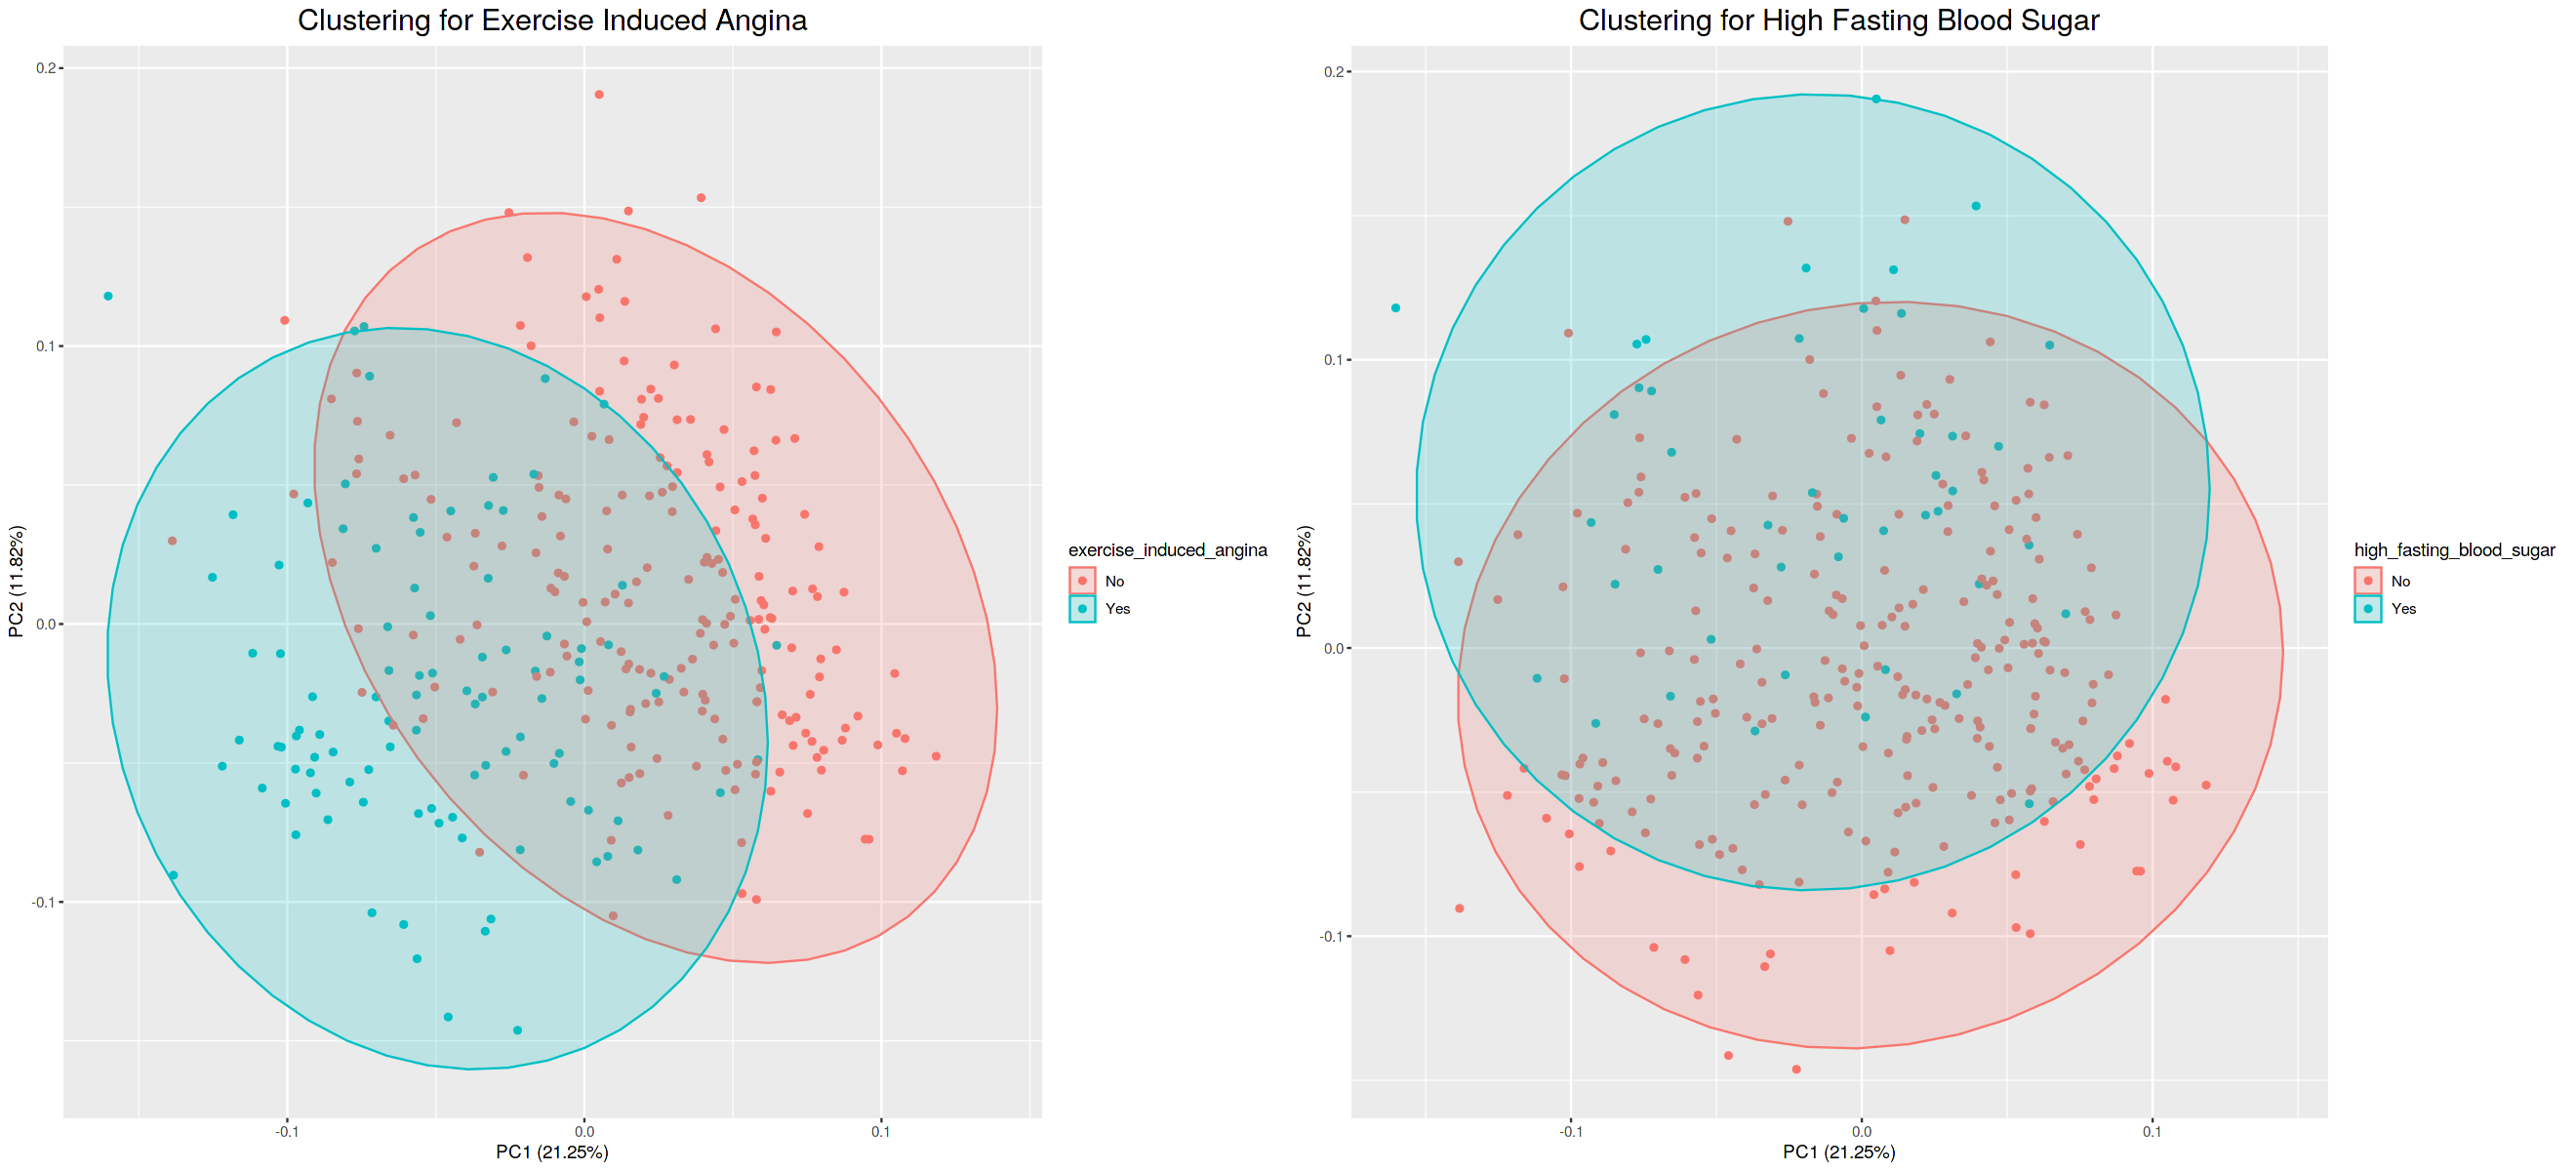

In [15]:
options(repr.plot.width=22, repr.plot.height=10)
p1 <- autoplot(heart_data_pca, data=heart_data, 
         x=1,
         y=2,
         colour="exercise_induced_angina", 
         frame=TRUE,
         frame.type='norm') + 
      ggtitle("Clustering for Exercise Induced Angina") + 
      theme(plot.title=element_text(hjust=0.5, size=18))
p2 <- autoplot(heart_data_pca, data=heart_data, 
         x=1,
         y=2,
         colour="high_fasting_blood_sugar", 
         frame=TRUE,
         frame.type='norm') + 
      ggtitle("Clustering for High Fasting Blood Sugar") + 
      theme(plot.title=element_text(hjust=0.5, size=18))
ggarrange(p1, p2, ncol=2, nrow=1)